In [2]:
#Load other modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #Graphics
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#To show graphs within the notebook
%matplotlib inline 

In [4]:
train = pd.read_csv("./input/train.csv")

In [5]:
#Printing the size of the dataframe
print ("Training dataset has %i observations and %i variables" %(train.shape[0], train.shape[1]))

Training dataset has 42000 observations and 785 variables


In [6]:
#Seperate the target and independant variables
df_x=train.iloc[:,1:]
df_y=train.iloc[:,0]

#Check the frequency of each number
df_y.value_counts().sort_index()

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(33600, 784)
(8400, 784)


In [7]:
df_images = [X_train,X_test]
df_labels = [y_train,y_test]

result_images = pd.concat(df_images,ignore_index=True)
result_labels = pd.concat(df_labels,ignore_index=True)


In [8]:
#training random Forest
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [9]:
# Make predictions for the test set
y_pred_test = rf.predict(X_test)

In [10]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.965

In [11]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[796,   0,   1,   1,   2,   2,   4,   0,   7,   0],
       [  0, 947,   8,   2,   1,   0,   1,   0,   2,   0],
       [  4,   1, 835,   5,   3,   0,   3,   4,   5,   0],
       [  2,   0,  13, 816,   0,  10,   2,   8,   8,   4],
       [  1,   2,   0,   0, 797,   0,   4,   1,   3,  19],
       [  3,   1,   0,  10,   0, 732,   6,   2,   2,   0],
       [  2,   0,   0,   0,   2,   6, 829,   0,   2,   0],
       [  1,   2,  14,   1,   3,   0,   0, 866,   1,  11],
       [  2,   3,   2,   9,   4,   8,   6,   2, 726,   6],
       [  7,   1,   1,   8,  15,   3,   1,  10,   4, 762]], dtype=int64)

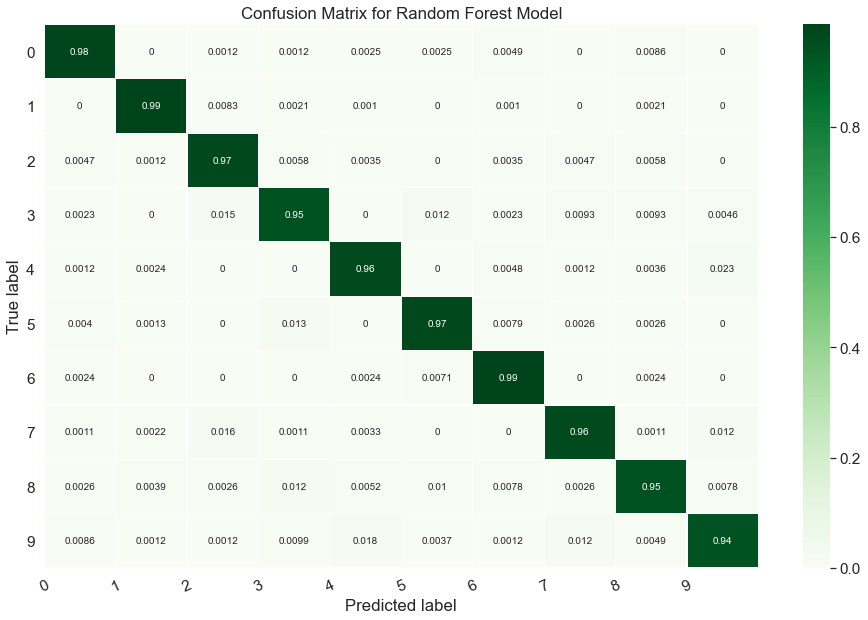

In [12]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,10))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0','1', '2', '3', 
               '4', '5', '6',    
               '7','8','9']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [13]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       813
           1       0.99      0.99      0.99       961
           2       0.96      0.97      0.96       860
           3       0.96      0.95      0.95       863
           4       0.96      0.96      0.96       827
           5       0.96      0.97      0.97       756
           6       0.97      0.99      0.98       841
           7       0.97      0.96      0.97       899
           8       0.96      0.95      0.95       768
           9       0.95      0.94      0.94       812

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [14]:
arr = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        if i!=j:
            arr[i][j]=matrix[i][j]+matrix[j][i]


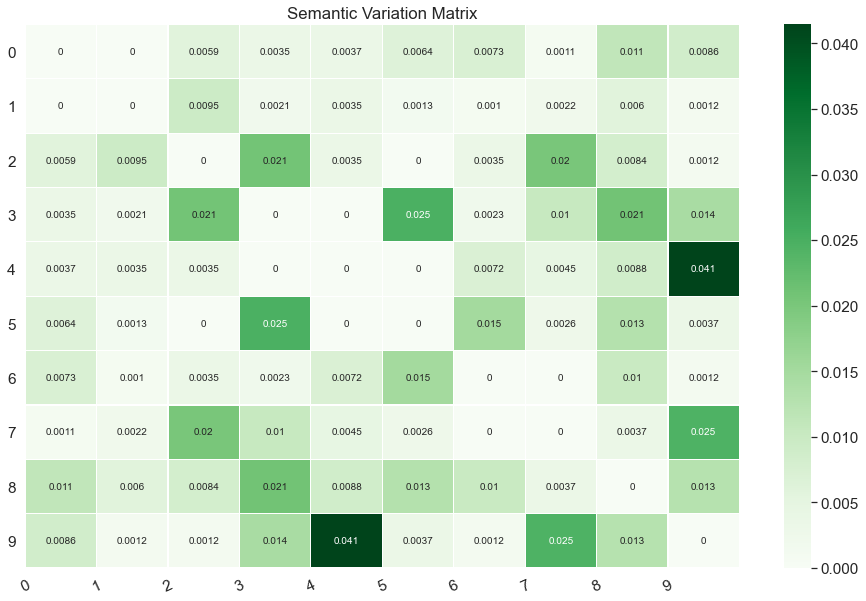

In [27]:
# Build the plot
plt.figure(figsize=(16,10))
sns.set(font_scale=1.4)
sns.heatmap(arr, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0','1', '2', '3', 
               '4', '5', '6',    
               '7','8','9']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
#plt.xlabel('Predicted label')
#plt.ylabel('True label')
plt.title('Semantic Variation Matrix')
plt.show()

In [15]:
result=np.array(arr).flatten()
result=np.sort(result)

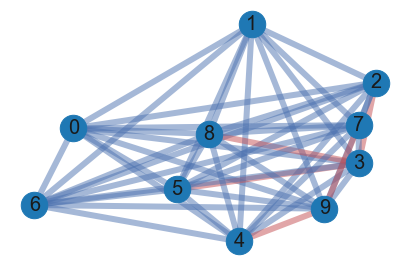

In [25]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

for i in range(10):
    for j in range(10):
        if i!=j:
            if arr[i][j]>=result[len(result)-10]:
                G.add_edge(i, j, color='r', weight=arr[i][j])
            else:
                G.add_edge(i, j, color='b', weight=arr[i][j])

colors = nx.get_edge_attributes(G,'color').values()
weights = nx.get_edge_attributes(G,'weight').values()


pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(
    G, pos, width=6, alpha=0.5, edge_color=colors, style="solid"
)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()